In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
titanic = sns.load_dataset('titanic')

In [40]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [41]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [43]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

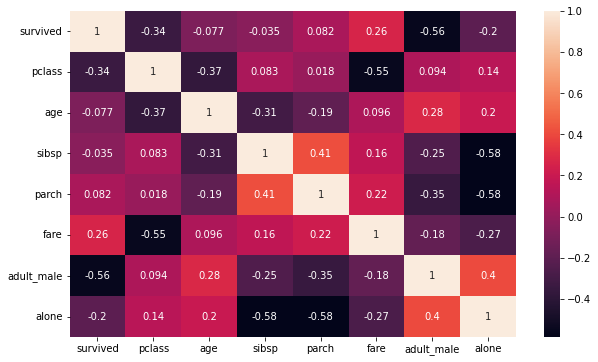

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(), annot=True)

In [46]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
titanic.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [48]:
titanic.groupby(['class','sex']).mean()[['survived']]

survived
class  sex             
First  female  0.968085
       male    0.368852
Second female  0.921053
       male    0.157407
Third  female  0.500000
       male    0.135447

In [49]:
titanic.groupby(['embark_town','sex']).mean()

survived    pclass        age     sibsp     parch  \
embark_town sex                                                         
Cherbourg   female  0.876712  1.726027  28.344262  0.547945  0.493151   
            male    0.305263  2.010526  32.998841  0.263158  0.263158   
Queenstown  female  0.750000  2.888889  24.291667  0.222222  0.222222   
            male    0.073171  2.926829  30.937500  0.609756  0.121951   
Southampton female  0.689655  2.197044  27.771505  0.837438  0.788177   
            male    0.174603  2.421769  30.291440  0.448980  0.240363   

                         fare  adult_male     alone  
embark_town sex                                      
Cherbourg   female  75.169805    0.000000  0.342466  
            male    48.262109    0.947368  0.631579  
Queenstown  female  12.634958    0.000000  0.750000  
            male    13.838922    0.902439  0.731707  
Southampton female  38.740929    0.000000  0.354680  
            male    21.711996    0.929705  0.727891

In [50]:
round(titanic['age'].mean())

30

In [51]:
round(titanic[titanic['sex'] =='male']['age'].mean())

31

In [52]:
titanic[titanic['sex'] =='female']['age'].mean()

27.915708812260537

In [53]:
titanic[titanic['sex'] =='female']['age'].mean()

27.915708812260537

In [74]:
titanic['age'].isna().sum()

177

In [85]:
titanic['age'] = titanic.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.fillna(round(x.mean())))

In [86]:
titanic.groupby(['pclass', 'sex'])['age'].mean()

pclass  sex   
1       female    34.648936
        male      41.232951
2       female    28.730263
        male      30.762315
3       female    21.822917
        male      26.640980
Name: age, dtype: float64

In [87]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [88]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [90]:
titanic.dropna(subset='embark_town', inplace=True)

In [92]:
titanic.reset_index(drop=True, inplace=True)

In [93]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='fare'>

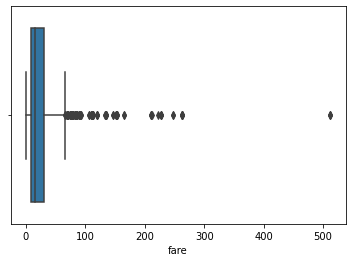

In [94]:
sns.boxplot(x='fare', data=titanic)

In [95]:
titanic['fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [97]:
titanic['fare'].quantile(0.75)

31.0

In [98]:
titanic['fare'].quantile(0.25)

7.8958

In [100]:
iqr = titanic['fare'].quantile(0.75) - titanic['fare'].quantile(0.25)

In [103]:
iqr* 1.5

34.6563

In [104]:
upper_bound = titanic['fare'].quantile(0.75) + iqr * 1.5

In [105]:
lower_bound = titanic['fare'].quantile(0.25) - iqr * 1.5

In [106]:
upper_bound

65.6563

In [107]:
lower_bound

-26.7605

In [112]:
titanic.loc[titanic['fare']> 65, 'fare'] = 65

In [113]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,65.000,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
885,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
886,0,3,female,22.0,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='fare'>

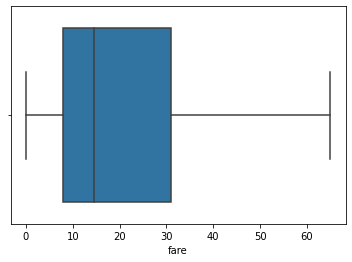

In [114]:
sns.boxplot(x='fare', data=titanic)

<AxesSubplot:xlabel='age'>

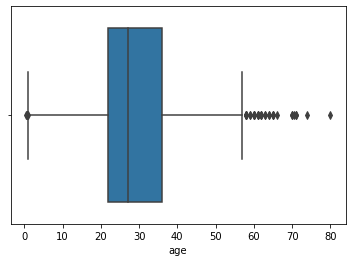

In [115]:
sns.boxplot(x='age', data=titanic)

In [116]:
titanic['age'].describe()

count    889.000000
mean      29.336524
std       13.226753
min        0.420000
25%       22.000000
50%       27.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64

In [117]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,65.000,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [118]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.5+ KB


In [120]:
titanic['Family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [121]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Family_size
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,65.000,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True,1


In [123]:
titanic.drop(['sibsp','parch'], axis=1, inplace=True)

In [124]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Family_size
0,0,3,male,22.0,7.250,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,65.000,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,7.925,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,53.100,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,8.050,S,Third,man,True,NaN,Southampton,no,True,1


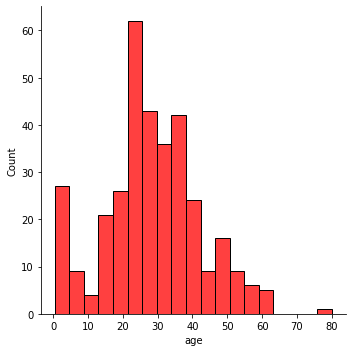

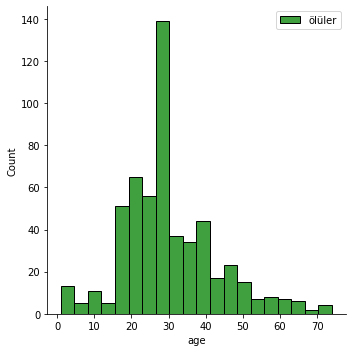

In [141]:
sns.displot(titanic[titanic['survived'] == 1]['age'], label='yasayanlar', color = 'red')
sns.displot(titanic[titanic['survived'] == 0]['age'], label='ölüler', color = 'green')

plt.legend()

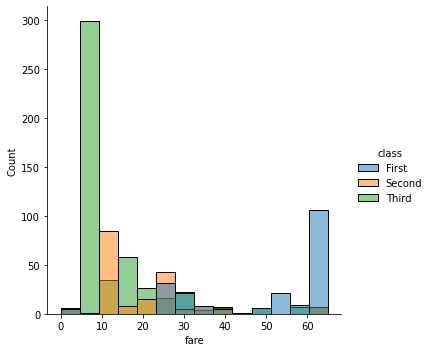

In [148]:
sns.displot(x='fare', data= titanic, hue='class')

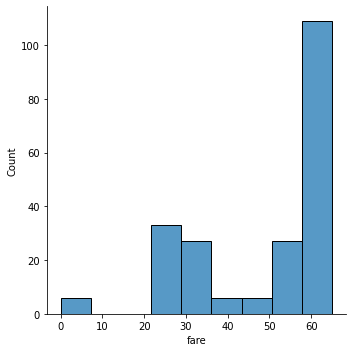

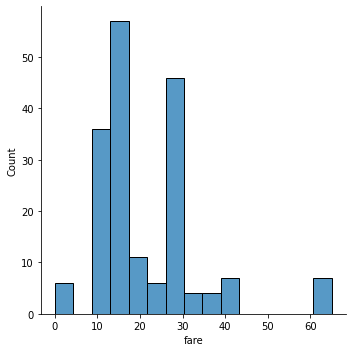

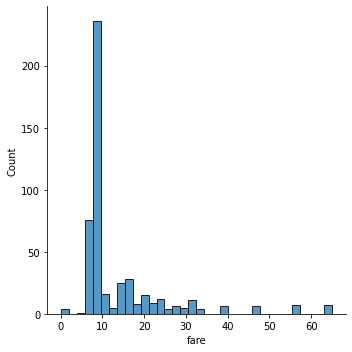

In [151]:
sns.displot(titanic[titanic['pclass'] == 1]['fare'])
sns.displot(titanic[titanic['pclass'] == 2]['fare'])
sns.displot(titanic[titanic['pclass'] == 3]['fare'])